In [25]:
import sys
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.7/libexec/bin/python3 -m pip install --upgrade pip' command.


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [27]:
# read csv files
df_west_raw = pd.read_csv('../../data/west_interval_data_01-29-2019_01-27-2021.csv')
df_east_raw = pd.read_csv('../../data/east_interval_data_01-29-2019_01-27-2021.csv')

In [28]:
df_west_raw.count()

Service Agreement    104736
Start Date Time      104736
End Date Time        104736
Usage                104724
Usage Unit           104724
Cost                      0
Currency Unit             0
Avg. Temperature     104716
Temperature Unit     104736
Event Flags               6
Peak Demand          104724
Demand Unit          104724
dtype: int64

In [69]:
def clean_data(data):
  df = data.copy(deep=True)

  # drop columns
  df = df.drop(columns=['Usage Unit', 'Currency Unit', 'Temperature Unit', 'Demand Unit'])

  # mapper for column rename
  rename_mapper = {'Service Agreement':'service',
                 'Start Date Time':'start',
                 'End Date Time':'end',
                 'Usage':'usage',
                 'Cost':'cost',
                 'Avg. Temperature':'temp',
                 'Event Flags':'event_flag',
                 'Peak Demand':'demand'}
  # rename columns
  df = df.rename(mapper=rename_mapper, axis='columns')


  # convert columns to datetime
    # convert date start into string and hourly index

  df.start, df.end = pd.to_datetime(df.start), pd.to_datetime(df.end)
    
    
  return df

In [70]:
df_west_clean = clean_data(df_west_raw)
df_west_clean.reset_index(level=0, inplace=True)
df_west_clean.index = df_west_clean.index+1
df_west_clean.head(10)


,index,service,start,end,usage,cost,temp,event_flag,demand
1,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8
2,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6
3,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0
4,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0
5,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8
6,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4
7,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4
8,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2
9,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4
10,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4


In [86]:
def strip_index(x):
    #y = x.strftime("%d-%b-%Y (%H:%M:%S.%f)") 
    y=str(x)
    #print (y, type(y))
    
    #x.toString()
    y = y[:13]
    #print(y)
    
    return y

In [ ]:
#datetime.strftime(Format_String)

In [87]:
#df_west_clean["new_index"] = pd.NaT
df_west_clean["start"]= df_west_clean["start"].apply(strip_index)

df_west_clean.head(10)

,index,service,start,end,usage,cost,temp,event_flag,demand
1,0,west,2019-01-29 00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8
2,1,west,2019-01-29 00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6
3,2,west,2019-01-29 00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0
4,3,west,2019-01-29 00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0
5,4,west,2019-01-29 01,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8
6,5,west,2019-01-29 01,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4
7,6,west,2019-01-29 01,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4
8,7,west,2019-01-29 01,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2
9,8,west,2019-01-29 02,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4
10,9,west,2019-01-29 02,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4


In [ ]:
df_west_clean[]

In [91]:
df_west_clean.dtypes

index                  int64
service               object
start                 object
end           datetime64[ns]
usage                float64
cost                 float64
temp                 float64
event_flag            object
demand               float64
dtype: object

In [37]:
x = "2019-01-29 00:00:00"

In [53]:
x = x[:13]
print (x)

2019-01-29 0


In [31]:
df_owapi = pd.read_csv('../../data/owapi-data.csv')


In [92]:
df_temp_hum = df_owapi[['dt', 'dt_iso', 'humidity', 'temp']]

df_temp_hum.rename(columns = {'temp' : 'humidity_temp'}, inplace = True)


/usr/local/Cellar/jupyterlab/3.0.7/libexec/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [93]:
filtered_df=df_temp_hum.query("dt_iso >= '2019-01-29 00:00:00' and dt_iso <= '2022-01-26 00:00:00'")
#filtered_df.set_index('id')
#filtered_df['id'] = filtered_df.index
filtered_df.reset_index(level=0, inplace=True)
filtered_df.index = filtered_df.index + 1

filtered_df.head()

,index,dt,dt_iso,humidity,humidity_temp
1,672,1548720000,2019-01-29 00:00:00 +0000 UTC,20,74.19
2,673,1548723600,2019-01-29 01:00:00 +0000 UTC,23,70.36
3,674,1548727200,2019-01-29 02:00:00 +0000 UTC,20,69.21
4,675,1548730800,2019-01-29 03:00:00 +0000 UTC,20,68.27
5,676,1548734400,2019-01-29 04:00:00 +0000 UTC,22,66.63


In [94]:
#df_west_clean["new_index"] = pd.NaT
filtered_df["dt_iso"]= filtered_df["dt_iso"].apply(strip_index)

filtered_df.head(10)

<ipython-input-94-214cae9bafb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["dt_iso"]= filtered_df["dt_iso"].apply(strip_index)


,index,dt,dt_iso,humidity,humidity_temp
1,672,1548720000,2019-01-29 00,20,74.19
2,673,1548723600,2019-01-29 01,23,70.36
3,674,1548727200,2019-01-29 02,20,69.21
4,675,1548730800,2019-01-29 03,20,68.27
5,676,1548734400,2019-01-29 04,22,66.63
6,677,1548738000,2019-01-29 05,21,67.32
7,678,1548741600,2019-01-29 06,20,66.04
8,679,1548745200,2019-01-29 07,21,64.85
9,680,1548748800,2019-01-29 08,21,63.86
10,681,1548752400,2019-01-29 09,21,63.41


In [95]:
#merge

df_westdf_west_clean.merge(filtered_df, left_on='start', right_on='dt_iso')

,index_x,service,start,end,usage,cost,temp,event_flag,demand,index_y,dt,dt_iso,humidity,humidity_temp
0,0,west,2019-01-29 00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,672,1548720000,2019-01-29 00,20,74.19
1,1,west,2019-01-29 00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,672,1548720000,2019-01-29 00,20,74.19
2,2,west,2019-01-29 00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,672,1548720000,2019-01-29 00,20,74.19
3,3,west,2019-01-29 00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,672,1548720000,2019-01-29 00,20,74.19
4,4,west,2019-01-29 01,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,673,1548723600,2019-01-29 01,23,70.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104635,104635,west,2022-01-25 22,2022-01-25 23:00:00,288.8,NaN,49.0,NaN,1155.2,26902,1643148000,2022-01-25 22,27,69.22
104636,104636,west,2022-01-25 23,2022-01-25 23:15:00,289.6,NaN,50.0,NaN,1158.4,26903,1643151600,2022-01-25 23,26,68.34
104637,104637,west,2022-01-25 23,2022-01-25 23:30:00,297.6,NaN,50.0,NaN,1190.4,26903,1643151600,2022-01-25 23,26,68.34
104638,104638,west,2022-01-25 23,2022-01-25 23:45:00,289.6,NaN,50.0,NaN,1158.4,26903,1643151600,2022-01-25 23,26,68.34


In [96]:
df_west_clean.to_csv("with_humidity.csv")

In [ ]:
df_west_clean.head()

In [90]:
filtered_df.dtypes

index         int64
dt            int64
dt_iso       object
humidity      int64
temp        float64
dtype: object

In [23]:
filtered_df.tail()

,index,dt,dt_iso,humidity,temp
26228,26899,1643137200,2022-01-25 19:00:00 +0000 UTC,36,64.13
26229,26900,1643140800,2022-01-25 20:00:00 +0000 UTC,38,66.63
26230,26901,1643144400,2022-01-25 21:00:00 +0000 UTC,37,68.23
26231,26902,1643148000,2022-01-25 22:00:00 +0000 UTC,27,69.22
26232,26903,1643151600,2022-01-25 23:00:00 +0000 UTC,26,68.34


In [24]:
df_west_clean["humidity"] = pd.NaT

df_west_clean.tail()

,index,service,start,end,usage,cost,temp,event_flag,demand,humidity
104732,104731,west,2022-01-26 22:45:00,2022-01-26 23:00:00,282.4,NaN,51.0,NaN,1129.6,NaT
104733,104732,west,2022-01-26 23:00:00,2022-01-26 23:15:00,288.8,NaN,51.0,NaN,1155.2,NaT
104734,104733,west,2022-01-26 23:15:00,2022-01-26 23:30:00,289.6,NaN,51.0,NaN,1158.4,NaT
104735,104734,west,2022-01-26 23:30:00,2022-01-26 23:45:00,294.4,NaN,51.0,NaN,1177.6,NaT
104736,104735,west,2022-01-26 23:45:00,2022-01-27 00:00:00,290.4,NaN,51.0,NaN,1161.6,NaT


In [21]:
#df_west_clean['humidity']= filtered_df['humidity']
df_west_clean.head()

,index,service,start,end,usage,cost,temp,event_flag,demand,humidity
1,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,NaT
2,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,NaT
3,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,NaT
4,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,NaT
5,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,NaT


In [22]:
#def math(count, kount):
#    df_west_clean['humidity'][count]= filtered_df['humidity'][kount]
    
#for row in df_west_clean.iterrows():
#    for hum in filtered_df.iterrows():
#        row.humidity = hum.humidity

#for h in range(1,26233):
#    for j in range (1,104734):
#        for i in range(0,4):
#            df_west_clean['humidity'][j+i] = filtered_df['humidity'][h]


for j in range (1,9):
    for h in range(1,3):
        for i in range(0,4):
            df_west_clean['humidity'][j] = filtered_df['humidity'][h]

df_west_clean.head(10)

<ipython-input-22-40694294d5c2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_west_clean['humidity'][j] = filtered_df['humidity'][h]


,index,service,start,end,usage,cost,temp,event_flag,demand,humidity
1,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,23
2,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,23
3,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,23
4,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,23
5,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,23
6,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4,23
7,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4,23
8,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2,23
9,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4,NaT
10,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4,NaT


In [ ]:
df_west_clean.head()

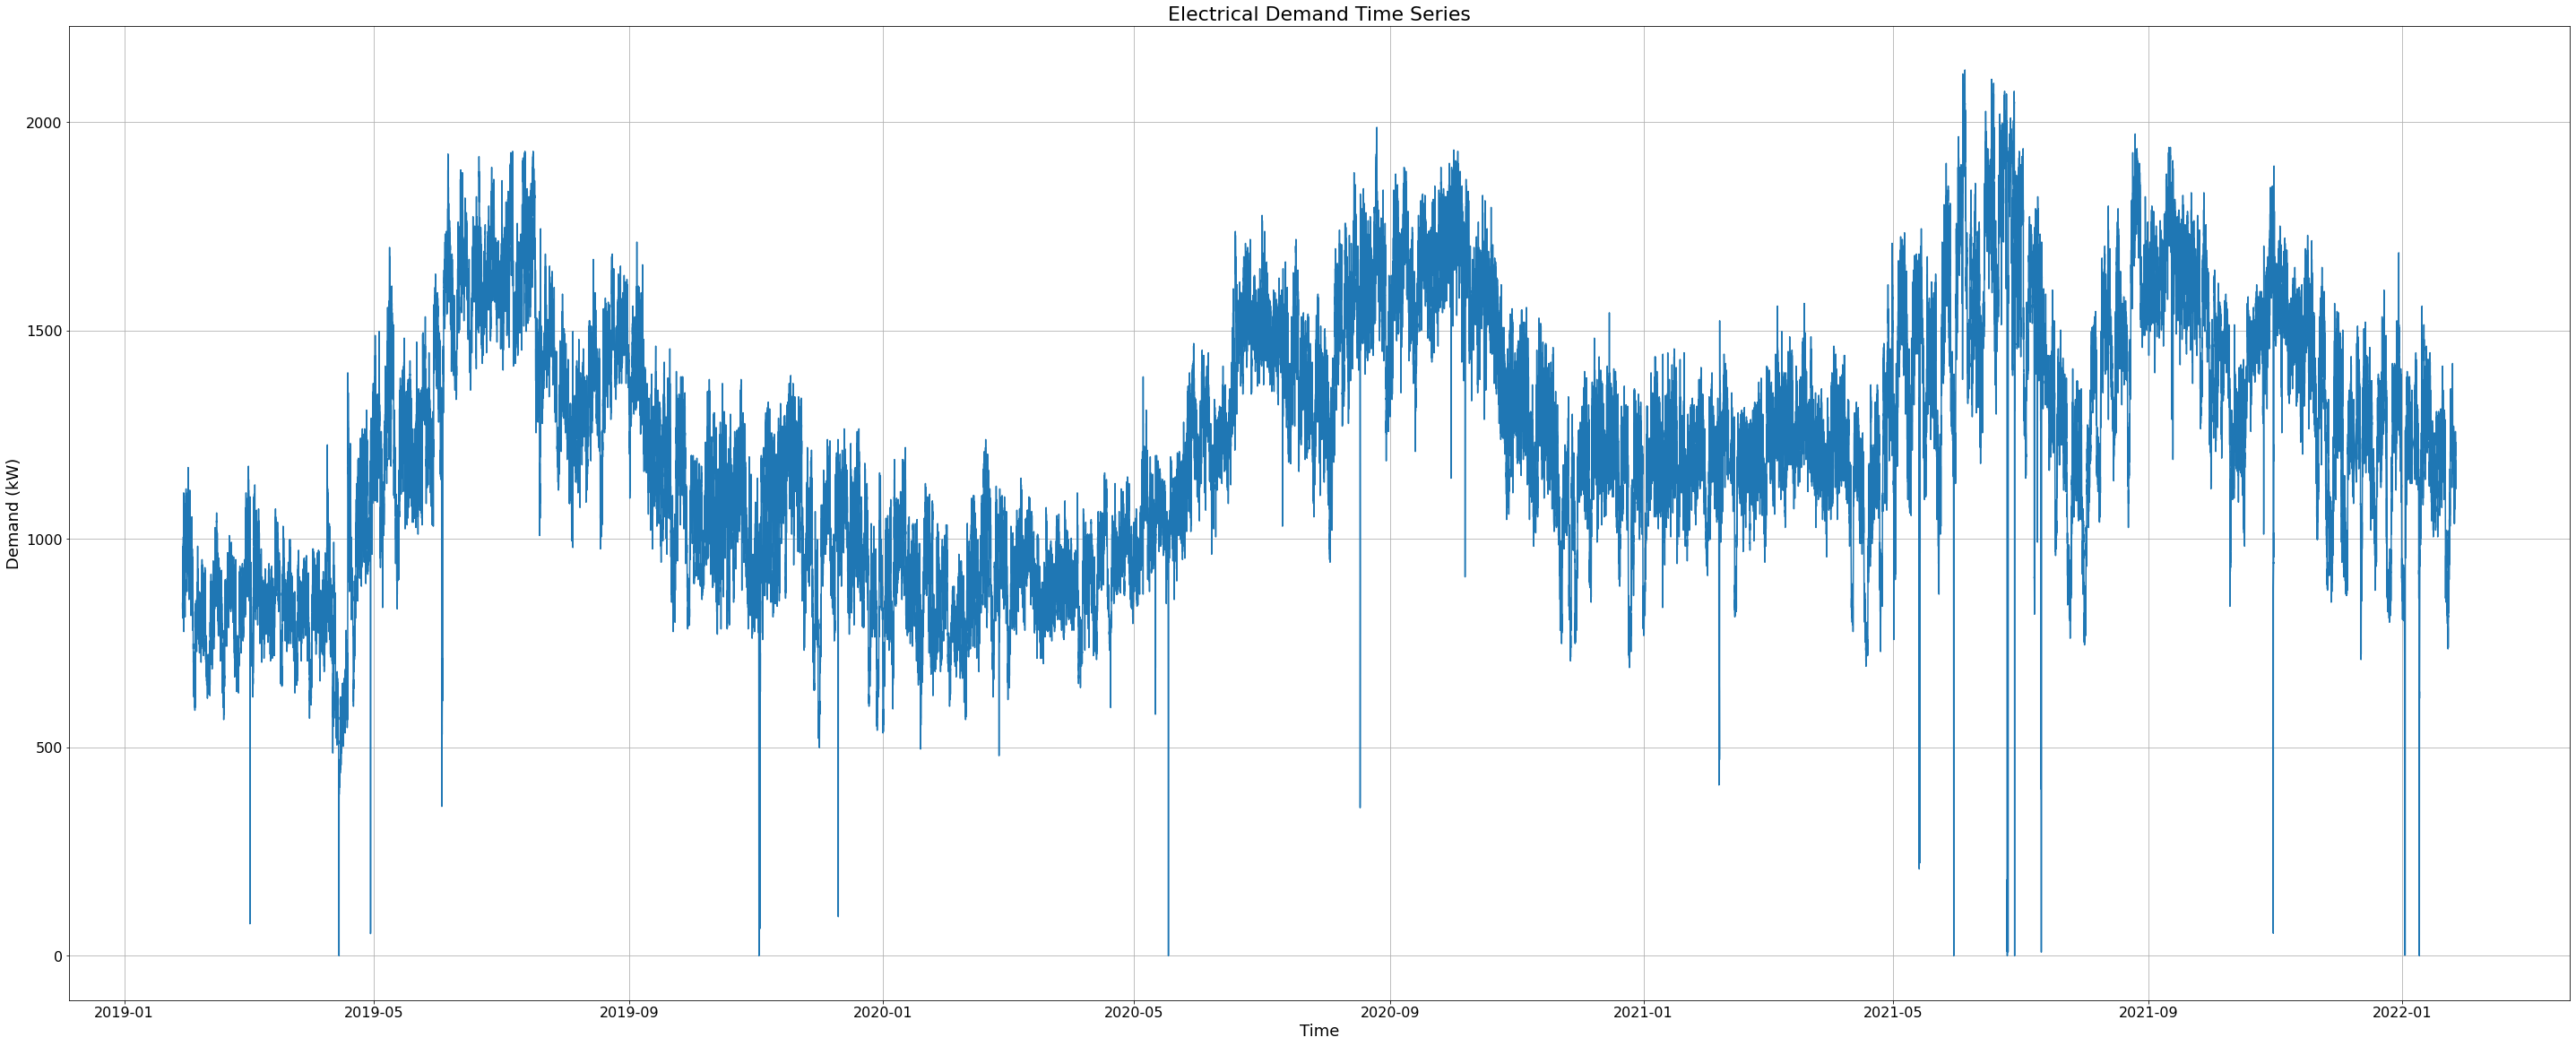

In [28]:
plt.rcParams['figure.figsize'] = (50, 20)
fig, ax = plt.subplots()

# add the time-series for "relative_temp" to the plot
ax.plot(df_west_clean.start, df_west_clean.demand)

# set title
ax.set_title("Electrical Demand Time Series", fontsize=22)

# set x-axis label
ax.set_xlabel("Time", fontsize=18)

# set y-axis label
ax.set_ylabel("Demand (kW)", fontsize=18)

# set xtick label
plt.xticks(fontsize=16)

# set ytick label
plt.yticks(fontsize=16)

ax.grid()

plt.show()

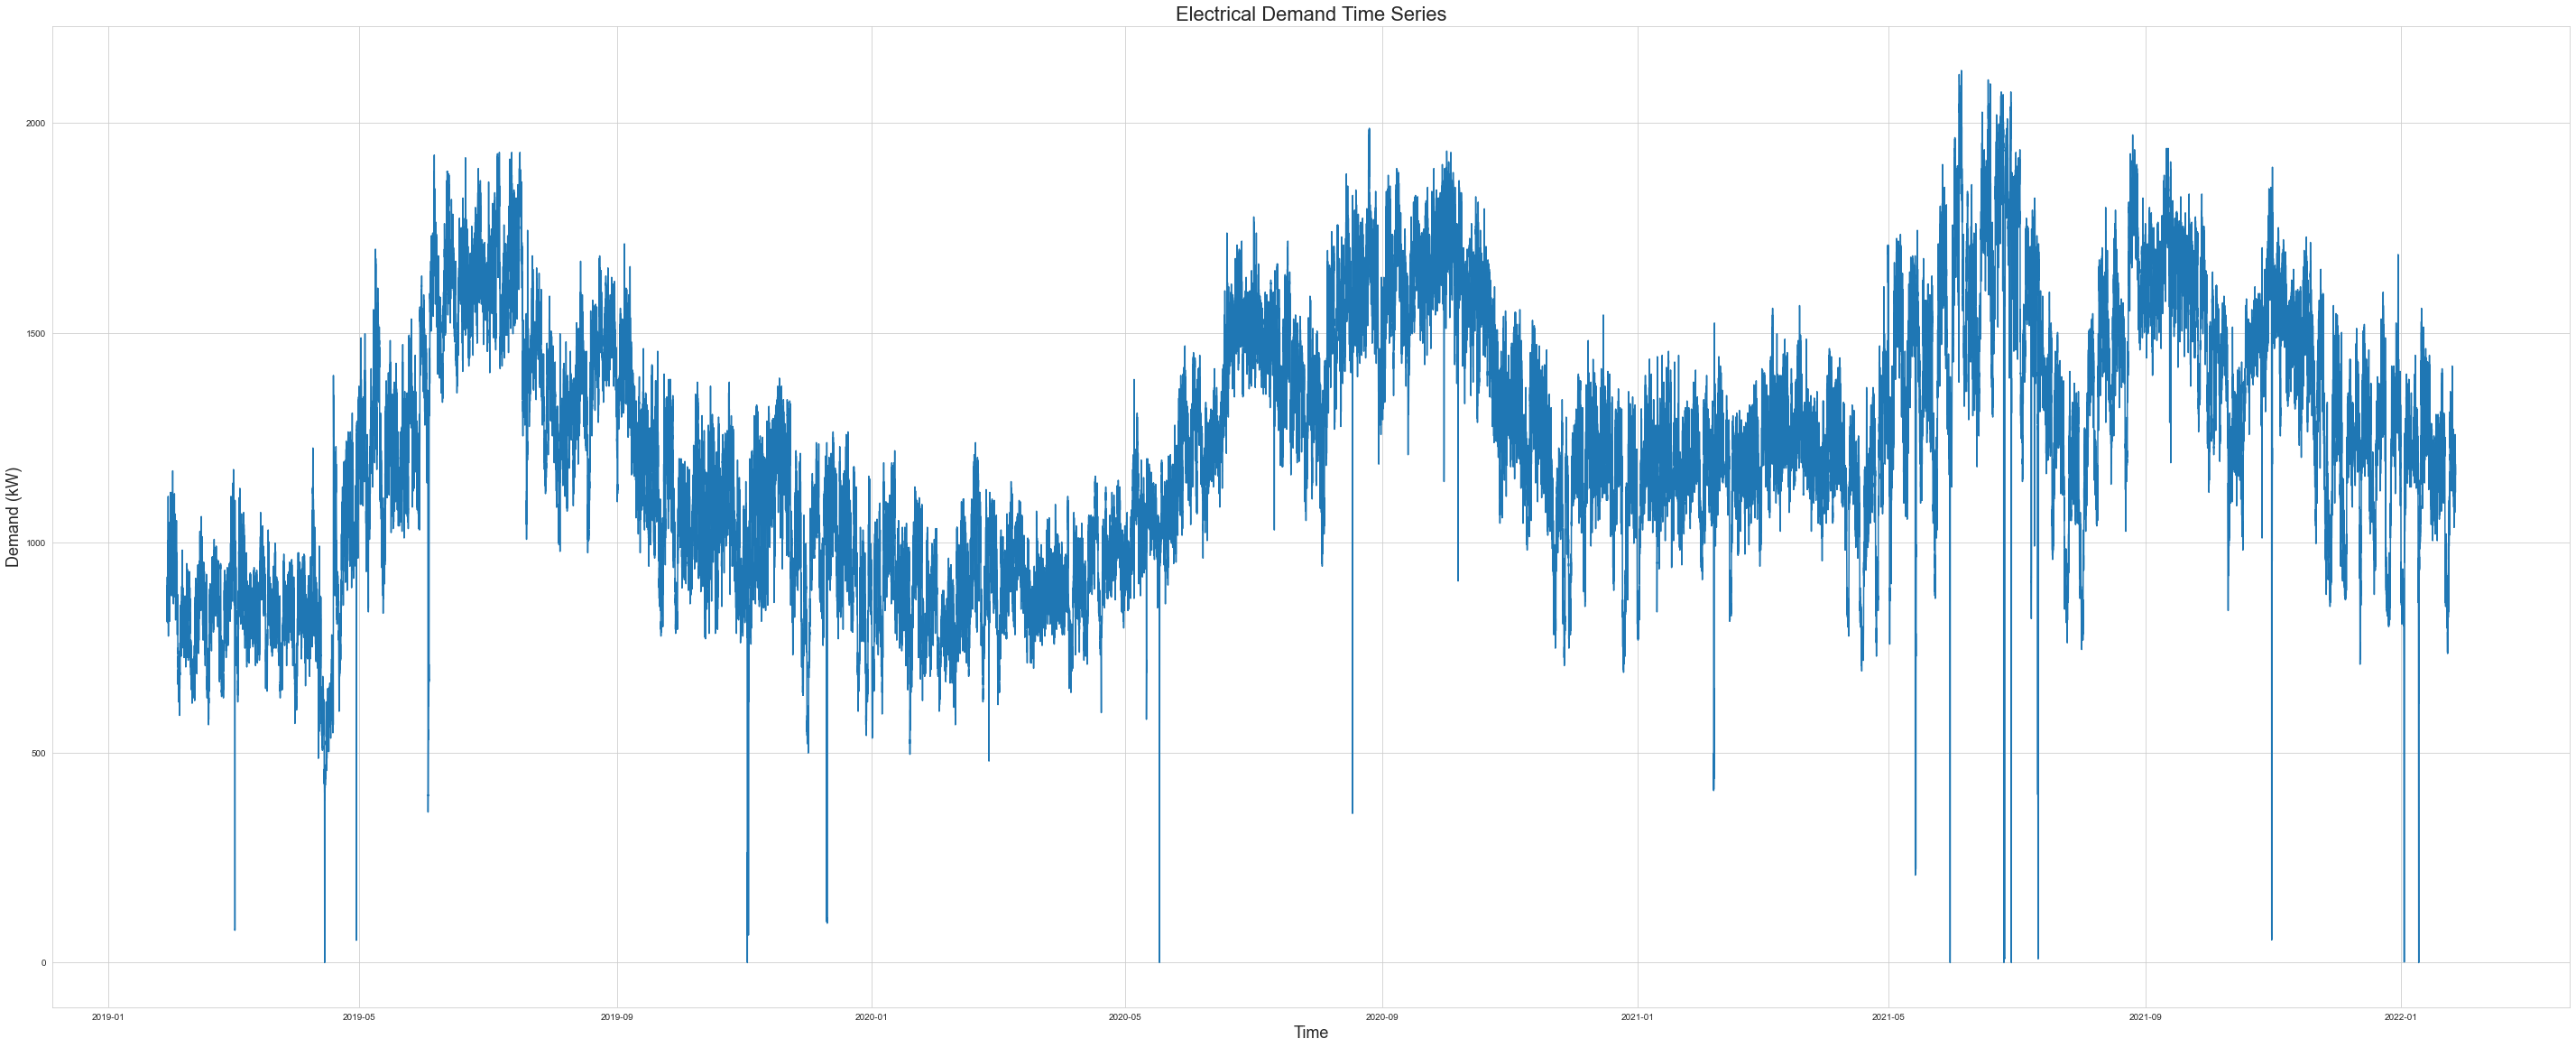

In [29]:
sns.set_style("whitegrid")
p = sns.lineplot(data=df_west_clean, x='start', y='demand')
p.set_title('Electrical Demand Time Series', fontsize=22)
p.set_xlabel('Time', fontsize=18)
p.set_ylabel('Demand (kW)', fontsize=18)
plt.show()

In [30]:
df_west_clean.head()

,service,start,end,usage,cost,temp,event_flag,demand
0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8
1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6
2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0
3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0
4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8


In [31]:
def feature_engineering(data):
  df = data.copy(deep=True)

  df['hour'] = df.start.dt.hour
  df['day'] = df.start.dt.dayofweek
  df['week'] = df.start.dt.isocalendar().week
  df['month'] = df.start.dt.month
  df['year'] = df.start.dt.year
  df['date'] = df.start.dt.date
  holidays = calendar().holidays(start=df.date.min(), end=df.date.max()).date
  df['holidays'] = df.date.isin(holidays)

  return df

In [32]:
df = feature_engineering(df_west_clean)
df.head()

,service,start,end,usage,cost,temp,event_flag,demand,hour,day,week,month,year,date,holidays
0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,0,1,5,1,2019,2019-01-29,False
1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,0,1,5,1,2019,2019-01-29,False
2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,0,1,5,1,2019,2019-01-29,False
3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,0,1,5,1,2019,2019-01-29,False
4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,1,1,5,1,2019,2019-01-29,False


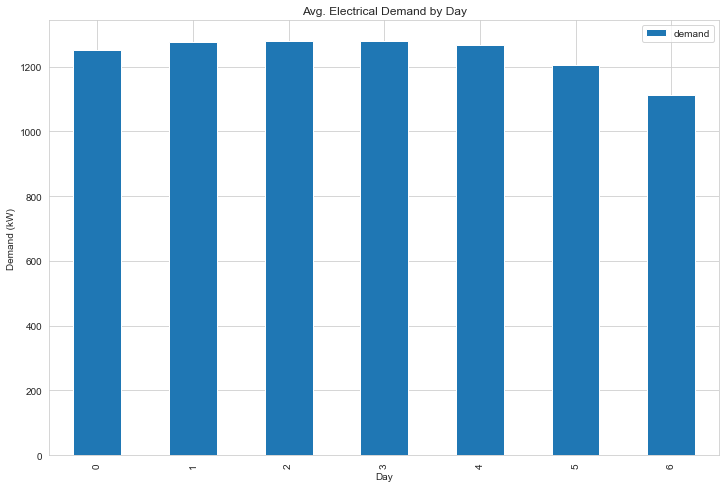

In [33]:
plt.rcParams['figure.figsize'] = (12, 8)
df[['day', 'demand']].groupby('day').mean().plot(kind='bar')
plt.title('Avg. Electrical Demand by Day')
plt.xlabel('Day')
plt.ylabel("Demand (kW)")
plt.show()

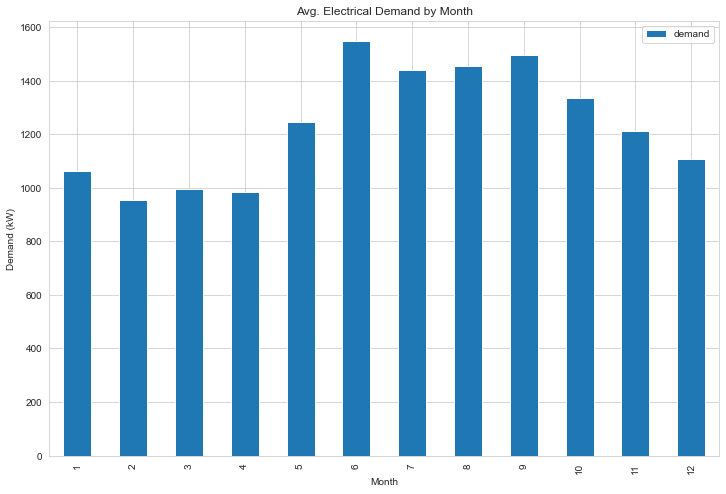

In [34]:
plt.rcParams['figure.figsize'] = (12, 8)
df[['month', 'demand']].groupby('month').mean().plot(kind='bar')
plt.title('Avg. Electrical Demand by Month')
plt.xlabel('Month')
plt.ylabel("Demand (kW)")
plt.show()

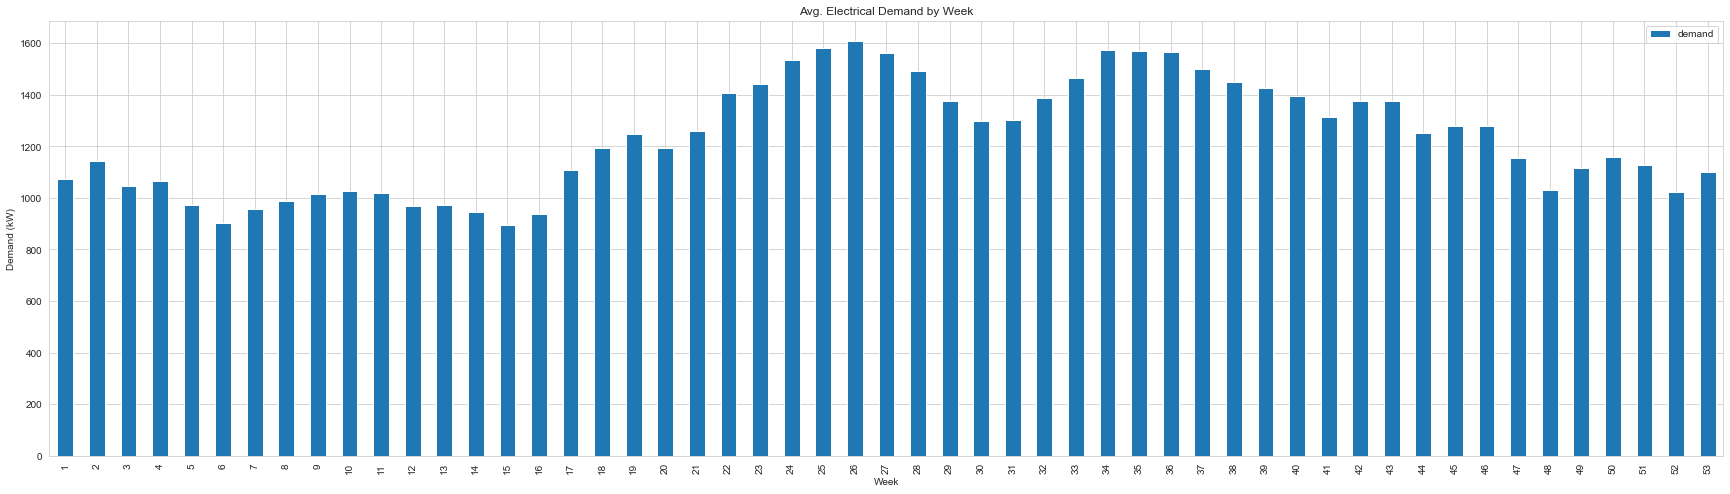

In [35]:
plt.rcParams['figure.figsize'] = (30, 8)
df[['week', 'demand']].groupby('week').mean().plot(kind='bar')
plt.title('Avg. Electrical Demand by Week')
plt.xlabel('Week')
plt.ylabel("Demand (kW)")
plt.show()

### Usage vs Temp Analysis

In [39]:
df_usage_temp = df[['usage', 'temp']]

In [40]:
df_usage_temp.head

<bound method NDFrame.head of         usage  temp
0       211.2  54.0
1       210.4  54.0
2       208.0  54.0
3       212.0  54.0
4       203.2  55.0
...       ...   ...
104731  282.4  51.0
104732  288.8  51.0
104733  289.6  51.0
104734  294.4  51.0
104735  290.4  51.0

[104736 rows x 2 columns]>

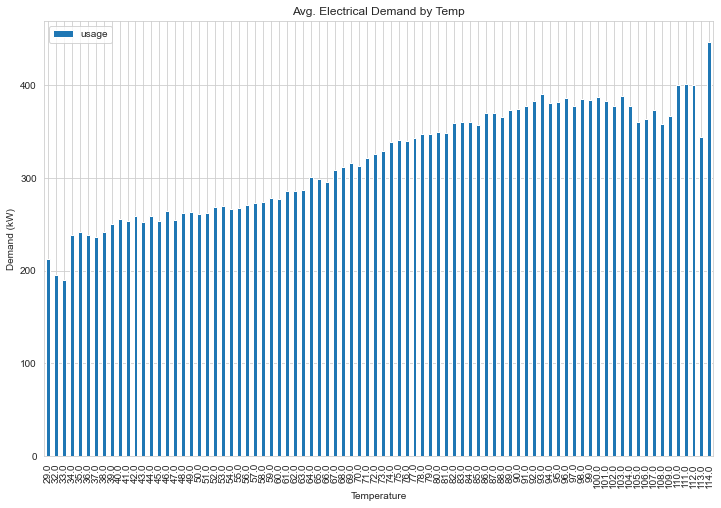

In [41]:
plt.rcParams['figure.figsize'] = (12, 8)
df[['usage', 'temp']].groupby('temp').mean().plot(kind='bar')
plt.title('Avg. Electrical Demand by Temp')
plt.xlabel('Temperature')
plt.ylabel("Demand (kW)")
plt.show()

In [43]:
!pip3 install -U streamlit hiplot

     |████████████████████████████████| 9.7 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 862 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 8.3 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 8.6 MB/s  eta 0:00:01
     |████████████████████████████████| 164 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 19.2 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 961 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 180 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 5.4 MB/s  eta 0:00:01


     |████████████████████████████████| 133 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 421 kB 8.5 MB/s eta 0:00:01
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13451 sha256=fcde2e73c60b962dd8a6f8782bb6abc05fd79724fba90760a7ca879dae8ad797
  Stored in directory: /Users/vsistla/Library/Caches/pip/wheels/50/93/f8/4f0a42a03a06626d675f13907b6982ad5ecff383530af5a900
Successfully built blinker
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-